In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#modification

In [4]:
#Code that extracts the data we use from a much larger dataset that comes from here https://git.nomics.world/dbnomics-source-data/cepii-source-data/-/blob/master/TRADE/trade_chel_YYYYMMDD.csv
"""
trade=pd.read_csv('trade_data.csv', usecols=['exporter', 'importer', 'secgroup', 'product', 'v2020', 'v2018','v2019'], sep=';')
trade_undifferenciated=trade[trade['product']=='TT']
trade_undifferenciated=trade_undifferenciated[['exporter','importer','secgroup','product','v2020', 'v2018','v2019']]
trade_undifferenciated.to_csv('Data_exports.csv')
"""

"\ntrade=pd.read_csv('trade_data.csv', usecols=['exporter', 'importer', 'secgroup', 'product', 'v2020'], sep=';')\ntrade_undifferenciated=trade[trade['product']=='TT']\ntrade_undifferenciated=trade_undifferenciated[['exporter','importer','secgroup','product','v2020']]\ntrade_undifferenciated.to_csv('Data_exports.csv')\n"

In [6]:
data=pd.read_csv('Data_exports_3years.csv', index_col=0)


In [7]:
data

,exporter,importer,secgroup,product,v2020,v2018,v2019
72,AES,AES,CAT,TT,227476.045916,281739.772971,259984.826826
456,AES,AFA,CAT,TT,1437.590947,1468.127508,1343.455107
840,AES,AFN,CAT,TT,5408.519442,6412.925102,6402.037064
1224,AES,AFR,CAT,TT,47568.935618,56280.987236,55060.219805
1608,AES,AFS,CAT,TT,16271.739595,18221.008905,17416.171171
...,...,...,...,...,...,...,...
7417416,YUG,VEN,CAT,TT,1.633391,2.329487,0.969835
7417800,YUG,VNM,CAT,TT,114.547872,115.641546,111.686894
7418184,YUG,WLD,CAT,TT,85068.226420,88358.844531,88344.314071
7418568,YUG,XXX,CAT,TT,132.854201,214.198379,201.497914


In [8]:
code_country= pd.read_csv('country_codes_3.csv', encoding='latin-1', sep=';')

In [9]:
code_country_reduced=code_country[['iso_3digit_alpha', 'country_name_full']]

In [10]:

dic = code_country_reduced.set_index('iso_3digit_alpha').T.to_dict('list')

<ipython-input-10-655fad0f3bcd>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dic = code_country_reduced.set_index('iso_3digit_alpha').T.to_dict('list')


In [11]:
list_false_country=['ASM', 'IOT', 'VGB', 'CYM', 'CXR','CCK', 'COK','CSK','FLK', 'PYF', 'ATF', 'GIB','KIR', 'GRL','GUM',
                    'MAC', 'MUS', 'MSR', 'ANT', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'NIU', 'NFK', 'MNP', 'PCN',
                   "BLM", 'SHN', 'KNA', 'AIA', 'LCA','SPM', 'VCT','SMR', 'STP', 'ZAF', 'TKL', 'TTO', 'TCA','SUN', 'WLF']
for i in list_false_country :
    dic.pop(i)

In [12]:
def complete_name (x):
    if x in dic.keys() :
        return dic[x][0]
    else :
        return ''
data['exporter_name']=data['exporter'].apply(complete_name)
data['importer_name']=data['importer'].apply(complete_name)

In [13]:
data

,exporter,importer,secgroup,product,v2020,v2018,v2019,exporter_name,importer_name
72,AES,AES,CAT,TT,227476.045916,281739.772971,259984.826826,,
456,AES,AFA,CAT,TT,1437.590947,1468.127508,1343.455107,,
840,AES,AFN,CAT,TT,5408.519442,6412.925102,6402.037064,,
1224,AES,AFR,CAT,TT,47568.935618,56280.987236,55060.219805,,
1608,AES,AFS,CAT,TT,16271.739595,18221.008905,17416.171171,,
...,...,...,...,...,...,...,...,...,...
7417416,YUG,VEN,CAT,TT,1.633391,2.329487,0.969835,,Venezuela
7417800,YUG,VNM,CAT,TT,114.547872,115.641546,111.686894,,Viet Nam
7418184,YUG,WLD,CAT,TT,85068.226420,88358.844531,88344.314071,,
7418568,YUG,XXX,CAT,TT,132.854201,214.198379,201.497914,,


In [14]:
data_complete = data[(data["importer_name"] != "") & (data["exporter_name"] != "")]

In [15]:
len(data_complete['importer_name'].unique())

80

In [20]:
def add_relative_volume(df, year):
    df_temp = df.copy()
    rel_vols = []
    for exp in df_temp.exporter.unique():
        total_volume = df_temp[df_temp["exporter"] == exp]["v"+str(year)].sum()
        for vol in df_temp[df_temp["exporter"] == exp]["v"+str(year)]:
            rel_vol = vol/total_volume
            rel_vols.append(rel_vol)
    df_temp["relative_volume"+"_"+str(year)] = rel_vols
    return df_temp

In [22]:
data_complete=add_relative_volume(data_complete, 2018)
data_complete=add_relative_volume(data_complete, 2019)
data_complete=add_relative_volume(data_complete, 2020)

In [23]:
data_relevant=data_complete[data_complete['relative_volume_2020']>.05]

In [24]:
data_relevant

,exporter,importer,secgroup,product,v2020,v2018,v2019,exporter_name,importer_name,relative_volume,relative_volume_2018,relative_volume_2019,relative_volume_2020
337992,ALB,DEU,CAT,TT,158.091928,136.516478,153.962513,Albania,Germany,0.081851,0.062960,0.069534,0.081851
341832,ALB,ESP,CAT,TT,153.783585,217.485677,225.081542,Albania,Spain,0.079620,0.100302,0.101653,0.079620
346824,ALB,GRC,CAT,TT,136.735389,131.838192,135.080288,Albania,Greece,0.070794,0.060803,0.061006,0.070794
350280,ALB,ITA,CAT,TT,786.785264,936.955822,889.557824,Albania,Italy,0.407353,0.432115,0.401749,0.407353
811848,ARG,BRA,CAT,TT,8239.436776,11554.341820,11068.918221,Argentina,Brazil,0.155157,0.200367,0.180010,0.155157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7189704,VEN,MYS,CAT,TT,419.944433,268.518473,603.252379,Venezuela,Malaysia,0.095323,0.008513,0.039092,0.095323
7220808,VNM,CHN,CAT,TT,74888.702313,58323.816311,60046.956992,Viet Nam,China,0.247177,0.231347,0.216117,0.247177
7236168,VNM,JPN,CAT,TT,20585.290628,19723.155080,20965.224084,Viet Nam,Japan,0.067944,0.078234,0.075457,0.067944
7237704,VNM,KOR,CAT,TT,19698.097677,18750.117508,20175.146814,Viet Nam,Republic of Korea,0.065015,0.074374,0.072613,0.065015


In [25]:
data_relevant.to_csv("data_relevant_mars_30", index = False)
data_complete.to_csv('data_complete_3_years.csv', index = False)

In [25]:
pd.read_csv("data_relevant_mars_30", sep=",")

,exporter,importer,secgroup,product,v2020,exporter_name,importer_name,relative_volume
0,ALB,DEU,CAT,TT,158.091928,Albania,Germany,0.081851
1,ALB,ESP,CAT,TT,153.783585,Albania,Spain,0.079620
2,ALB,GRC,CAT,TT,136.735389,Albania,Greece,0.070794
3,ALB,ITA,CAT,TT,786.785264,Albania,Italy,0.407353
4,ARG,BRA,CAT,TT,8239.436776,Argentina,Brazil,0.155157
...,...,...,...,...,...,...,...,...
372,VEN,MYS,CAT,TT,419.944433,Venezuela,Malaysia,0.095323
373,VNM,CHN,CAT,TT,74888.702313,Viet Nam,China,0.247177
374,VNM,JPN,CAT,TT,20585.290628,Viet Nam,Japan,0.067944
375,VNM,KOR,CAT,TT,19698.097677,Viet Nam,Republic of Korea,0.065015


## Construction Graph

In [20]:
list_country=list(data_complete['importer_name'].unique())

In [24]:
Graph_2020=nx.Graph()
Graph_2020.add_nodes_from(list_country)
Graph_2020.add_edges_from(zip(data_relevant['exporter_name'],data_relevant['importer_name']))

<function matplotlib.pyplot.show(close=None, block=None)>

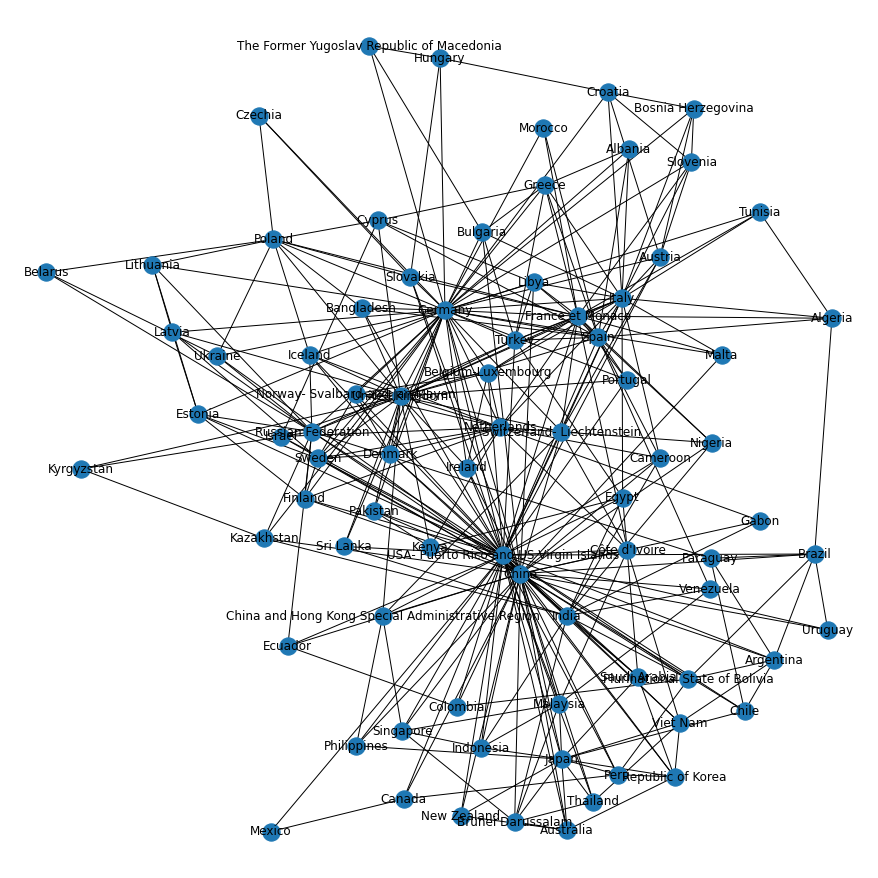

In [45]:
plt.figure(3, figsize=(12,12))
nx.draw(Graph_2020, with_labels=True, font_size=12)
plt.show